In [3]:
# First we add the libraries we will use.
# Ilk olaraq istifadə edəcəyimiz kitabxanaları əlavə edirik.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Then with the help of "Pandas" library we get the data from internal memory in CSV format.
# Daha sonra isə "Pandas" kitabxanasının köməyi ilə daxili yaddaşdan CSV formatında olan datanı əldə edirik.
train_dataset = pd.read_csv(r"D:\Downloads\Titanic train dataset.csv")
train_dataset.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.00,0,0,A/4 45380,8.0500,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.00,0,0,SOTON/O2 3101287,7.9250,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.2750,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.00,0,0,PC 17475,26.2875,E24,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.00,0,0,364511,8.0500,NaN,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.00,1,0,13502,77.9583,D11,S
441,442,0,3,"Hampe, Mr. Leon",male,20.00,0,0,345769,9.5000,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [93]:
# The "Explain" function is used to get general information about the columns in the data format number.
# Datada number formatda olan sütunlarla bağlı ümumi məlumat əldə etmək üçün "Describe" funksiyasından istifadə edilir.
train_dataset[["Survived","Pclass","Age","SibSp","Parch","Fare"]].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


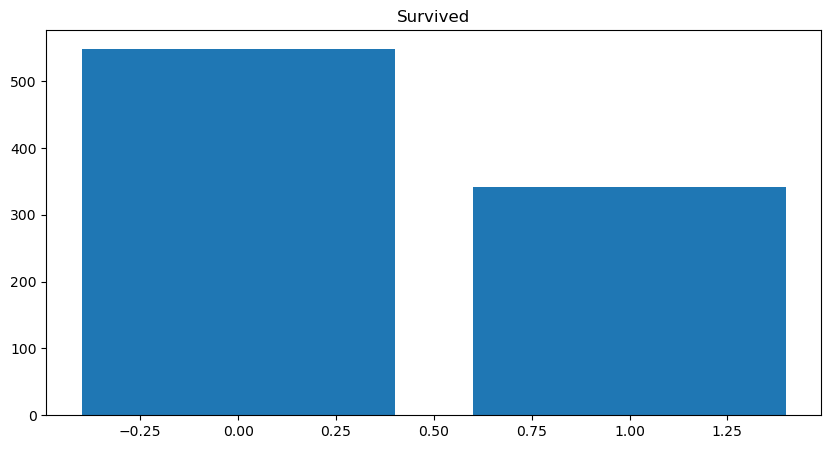

Survived Survived
0    549
1    342
Name: count, dtype: int64


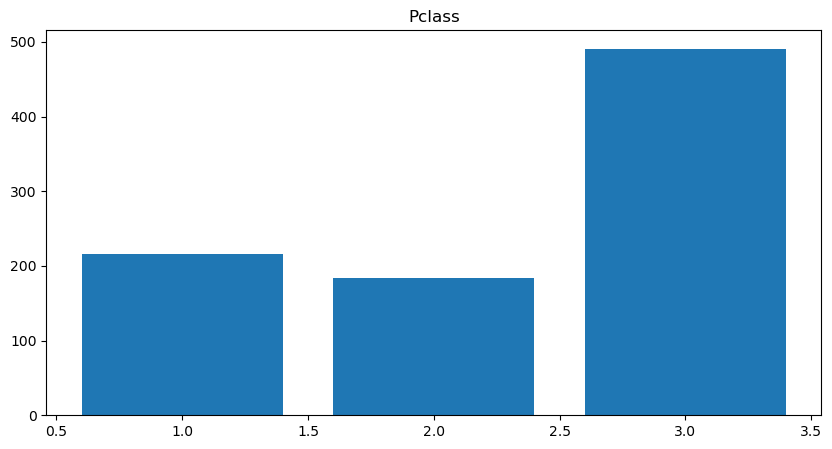

Pclass Pclass
3    491
1    216
2    184
Name: count, dtype: int64


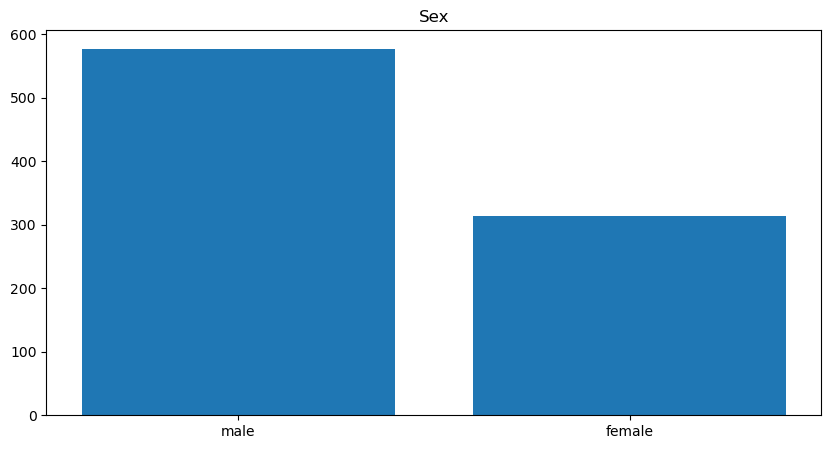

Sex Sex
male      577
female    314
Name: count, dtype: int64


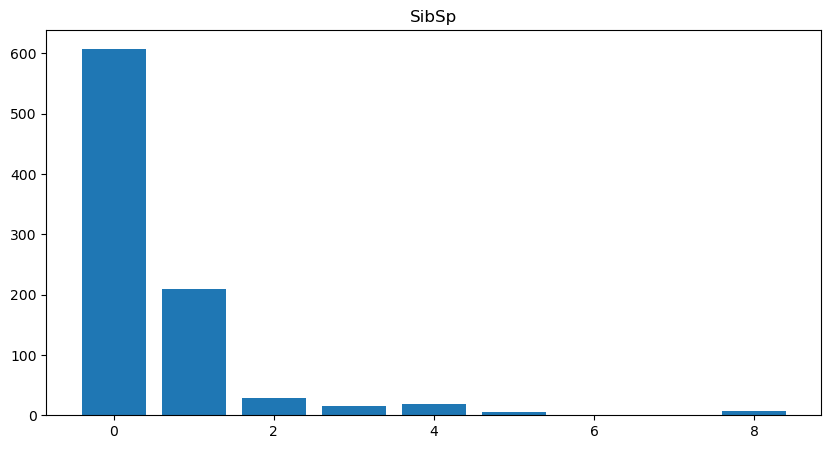

SibSp SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


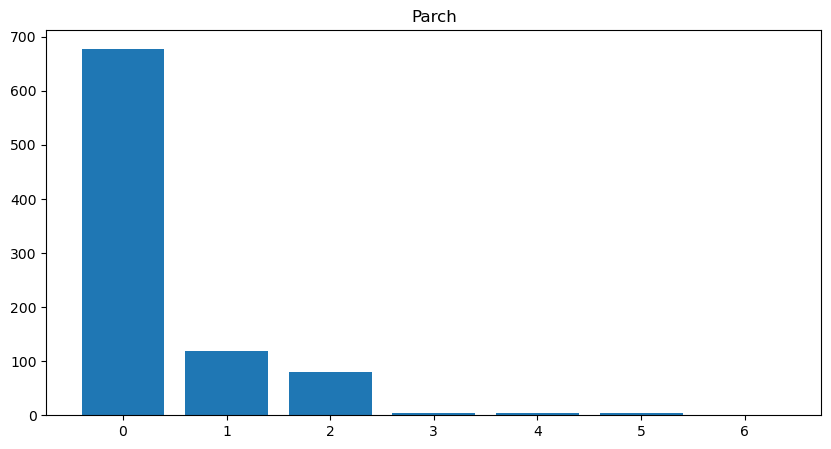

Parch Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


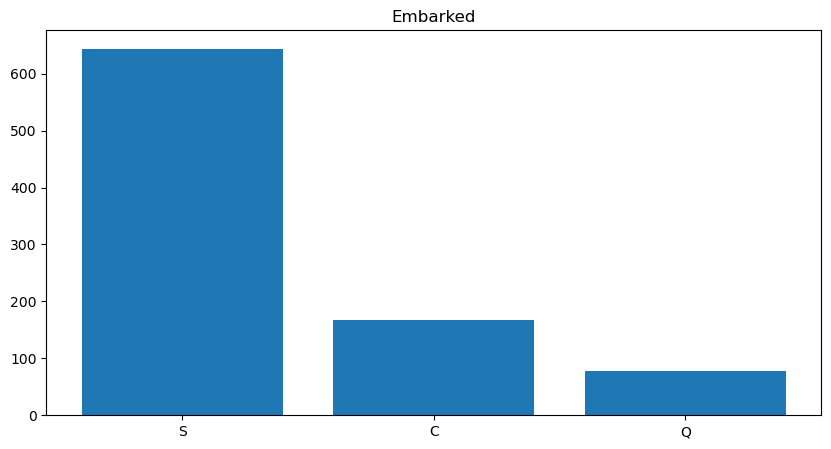

Embarked Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [51]:
def columns(variable):
    category = train_dataset[variable]
    number = category.value_counts()
    plt.figure(figsize=(10,5))
    plt.bar(number.index, number.values) 
    plt.title(variable)
    plt.show()
    print(variable, number)

category1 = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for i in category1:
    columns(i)




    

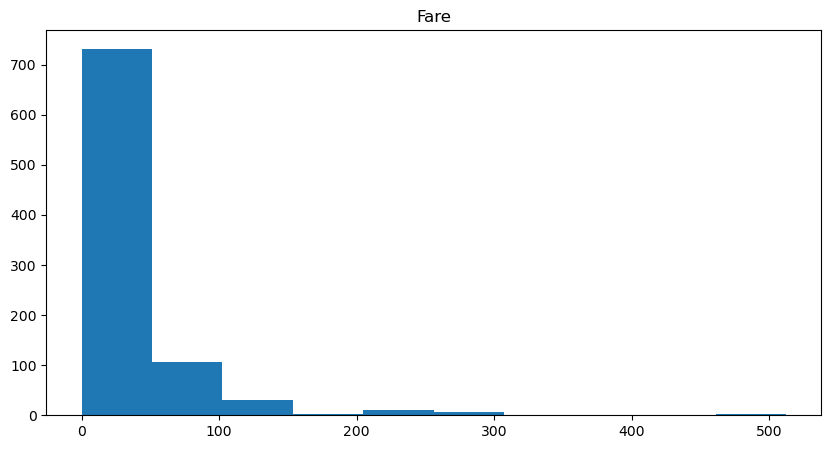

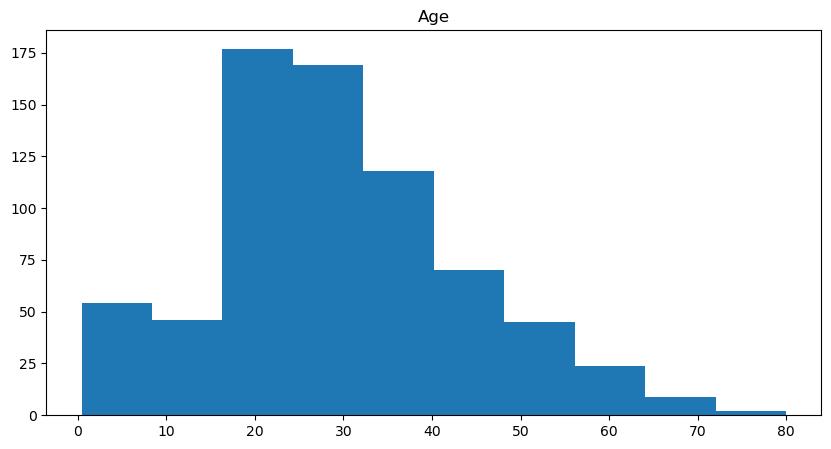

In [53]:
def hist(variable):
    plt.figure(figsize=(10,5))
    plt.hist(train_dataset[variable])
    plt.title(variable)
    plt.show()


numbers = ["Fare","Age"]

for i in numbers:
    hist(i)

In [65]:
train_dataset[["Pclass","Survived"]].groupby(["Pclass"],as_index= False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [68]:
train_dataset[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [76]:
train_dataset[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [78]:
train_dataset[["Parch","Survived"]].groupby("Parch",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [85]:

survived = train_dataset[train_dataset["Survived"] == 1]

# Hər bir Pclass üçün sağ qalanların cins faizini hesablamaq
gender_percentage_by_pclass = survived.groupby("Pclass")["Sex"].value_counts(normalize=True) * 100
gender_percentage_by_pclass


Pclass  Sex   
1       female    66.911765
        male      33.088235
2       female    80.459770
        male      19.540230
3       female    60.504202
        male      39.495798
Name: proportion, dtype: float64

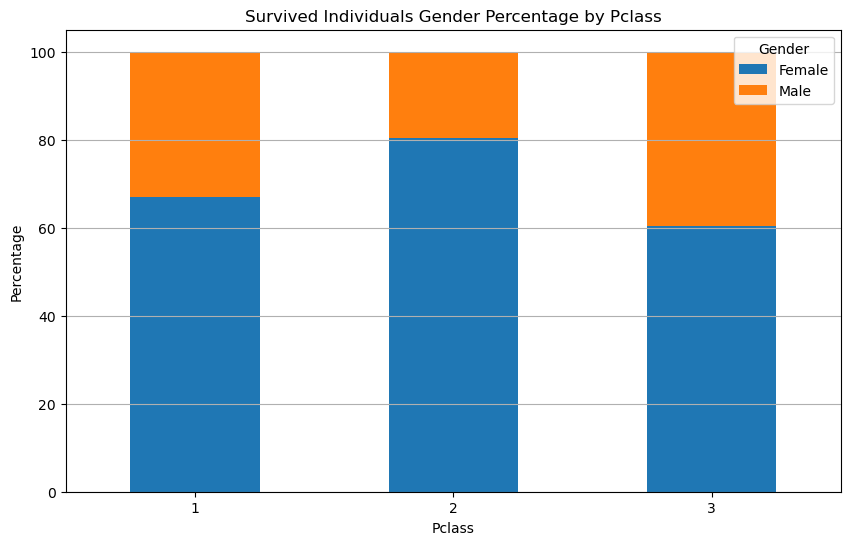

In [87]:




# Nəticələri DataFrame-ə çevir
gender_percentage_df = gender_percentage_by_pclass.unstack()

# Vizuallaşdırma
gender_percentage_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Survived Individuals Gender Percentage by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


In [89]:


# Hər bir Embarked üçün həyatda qalma faizi ortalamasını hesablayın
survival_rate_by_embarked = train_dataset.groupby("Embarked")["Survived"].mean() 

# Nəticəni çap et
print(survival_rate_by_embarked)


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


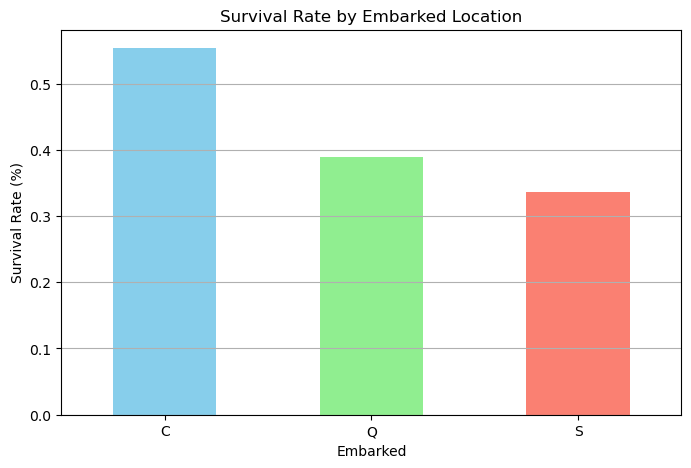

In [91]:
print(survival_rate_by_embarked)

survival_rate_by_embarked.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], figsize=(8, 5))

plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()